In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

from IPython.display import display
df = pd.read_excel("D:datasets\mldata\组合发动机热环境数据及热防护系统燃料热沉需求.xlsx")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,飞行马赫数,攻角,高度,大气静压,大气温度,大气密度,大气声速,飞行器速度,进气道捕获面积,流量系数,...,燃气密度,燃气粘度,燃气导热,燃气普朗特数,燃气雷诺数,壁面努塞尔数,壁面对流换热系数,壁面许用温度,壁面热流(MW/m2),热沉需求(MJ/kg)
1,MA,°,ALT,P_ATMOS,T_ATMOS,RHO_ATMOS,U_ATMOS,U_FLIGHT,A_INLET,Coe_FLOW,...,RHO_GAS,MIU_GAS,LAMDA_GAS,PR_GAS,RE_GAS,NU,h_WALL,Tw_GH1328,q_W,HEAT_SINK
2,3,0,18,7.569749,-56.46,0.121762,297.08524,891.25572,0.18,0.517,...,0.285,0.000096,0.162952,0.864349,849004.609663,1147.776649,685.786352,1300,0.891522,2.135788
3,3,2,18,7.569749,-56.46,0.121762,297.08524,891.25572,0.18,0.548,...,0.285,0.000098,0.168658,0.855482,848805.093436,1147.554311,709.663978,1300,0.99353,2.245519
4,3,5,18,7.569749,-56.46,0.121762,297.08524,891.25572,0.18,0.596,...,0.285,0.000101,0.174346,0.846047,848861.828254,1147.617536,733.636719,1300,1.100455,2.286876


In [2]:
col_rename = {}
for i in range(1,31):
    col_rename[i]=df.iloc[0,i-1]
col_rename[15]='长'
col_rename[16]='宽'
col_rename[17]='高'
col_rename[29]='壁面热流'
col_rename[30]='热沉需求'
df = df.rename(columns=col_rename).drop([0,1],axis='index').reset_index(drop=True)
df.head()

,飞行马赫数,攻角,高度,大气静压,大气温度,大气密度,大气声速,飞行器速度,进气道捕获面积,流量系数,...,燃气密度,燃气粘度,燃气导热,燃气普朗特数,燃气雷诺数,壁面努塞尔数,壁面对流换热系数,壁面许用温度,壁面热流,热沉需求
0,3,0,18,7.569749,-56.46,0.121762,297.08524,891.25572,0.18,0.517,...,0.285,0.000096,0.162952,0.864349,849004.609663,1147.776649,685.786352,1300,0.891522,2.135788
1,3,2,18,7.569749,-56.46,0.121762,297.08524,891.25572,0.18,0.548,...,0.285,0.000098,0.168658,0.855482,848805.093436,1147.554311,709.663978,1300,0.99353,2.245519
2,3,5,18,7.569749,-56.46,0.121762,297.08524,891.25572,0.18,0.596,...,0.285,0.000101,0.174346,0.846047,848861.828254,1147.617536,733.636719,1300,1.100455,2.286876
3,3,8,18,7.569749,-56.46,0.121762,297.08524,891.25572,0.18,0.642,...,0.285,0.000103,0.180016,0.836039,849145.204428,1147.93332,757.703678,1300,1.212326,2.338842
4,3.5,0,21,4.726381,-56.46,0.076026,297.08524,1039.79834,0.18,0.571,...,0.285,0.000096,0.162952,0.864349,849004.609663,1147.776649,685.786352,1300,0.891522,2.654719


In [3]:
df.shape

(32, 30)

In [4]:
df.columns

Index(['飞行马赫数', '攻角', '高度', '大气静压', '大气温度', '大气密度', '大气声速', '飞行器速度', '进气道捕获面积',
       '流量系数', '空气流量', '空燃比', '冷却当量比', '燃料流量', '长', '宽', '高', '水力直径', '燃气温度',
       '燃气马赫数', '燃气密度', '燃气粘度', '燃气导热', '燃气普朗特数', '燃气雷诺数', '壁面努塞尔数',
       '壁面对流换热系数', '壁面许用温度', '壁面热流', '热沉需求'],
      dtype='object')

In [5]:
from sklearn.cluster import KMeans  # 导入kmeans算法
from sklearn import metrics

X = np.array(df.iloc[0:,0:])

from sklearn.preprocessing import StandardScaler
X_train_reduction = StandardScaler().fit_transform(X)  #标准化数据

要分析特征的重要性，我们先通过K-means将每组数据打上标签<br>
这里利用轮廓系数去判断最佳的簇心，轮廓系数越大越好

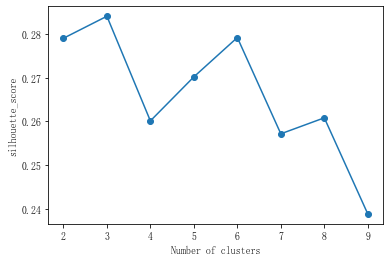

In [6]:
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_train_reduction)
    scores.append(metrics.silhouette_score(X_train_reduction, km.labels_ , metric='euclidean'))
plt.plot(range(2,10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=3, random_state=123)
kmeans.fit(X_train_reduction)
y_train = kmeans.labels_


1 随机森林
随机森林具有准确率高、鲁棒性好、易于使用等优点，这使得它成为了目前最流行的机器学习算法之一。

1.1 随机森林回归
随机森林由多个决策树构成。决策树中的每一个节点都是关于某个特征的条件，为的是将数据集按照不同的响应变量一分为二。利用不纯度可以确定节点（最优条件），对于分类问题，通常采用 基尼不纯度 或者 信息增益 ，对于回归问题，通常采用的是 方差 或者最小二乘拟合。当训练决策树的时候，可以计算出每个特征减少了多少树的不纯度。对于一个决策树森林来说，可以算出每个特征平均减少了多少不纯度，并把它平均减少的不纯度作为特征选择的值。


In [8]:
from sklearn.ensemble import RandomForestRegressor
X_train = np.array(df.iloc[0:,0:])
print(X_train.shape)

names = np.array(df.columns)
print(y_train.shape)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

(32, 30)
(32,)
[(0.5693, '攻角'), (0.0554, '燃气导热'), (0.0534, '燃气粘度'), (0.0389, '燃气普朗特数'), (0.0379, '大气温度'), (0.0318, '飞行马赫数'), (0.0313, '壁面对流换热系数'), (0.0286, '大气声速'), (0.0275, '大气密度'), (0.0243, '大气静压'), (0.0243, '壁面热流'), (0.024, '高度'), (0.0216, '飞行器速度'), (0.0178, '流量系数'), (0.0072, '燃气温度'), (0.0028, '燃气雷诺数'), (0.0014, '燃料流量'), (0.0012, '壁面努塞尔数'), (0.0009, '热沉需求'), (0.0005, '空气流量'), (0.0, '高'), (0.0, '长'), (0.0, '进气道捕获面积'), (0.0, '空燃比'), (0.0, '燃气马赫数'), (0.0, '燃气密度'), (0.0, '水力直径'), (0.0, '宽'), (0.0, '壁面许用温度'), (0.0, '冷却当量比')]


前6项为 '攻角'， '燃气温度',大气温度', '燃气粘度', '飞行器速度'，'大气声速'

这里特征得分实际上采用的是 Gini Importance 。使用基于不纯度的方法的时候，要记住：1、这种方法存在 偏向 ，对具有更多类别的变量会更有利；2、对于存在关联的多个特征，其中任意一个都可以作为指示器（优秀的特征），并且一旦某个特征被选择之后，其他特征的重要度就会急剧下降，因为不纯度已经被选中的那个特征降下来了，其他的特征就很难再降低那么多不纯度了，这样一来，只有先被选中的那个特征重要度很高，其他的关联特征重要度往往较低。在理解数据时，这就会造成误解，导致错误的认为先被选中的特征是很重要的，而其余的特征是不重要的，但实际上这些特征对响应变量的作用确实非常接近的（这跟Lasso是很像的）。

1.2通过随机森林分类方法对特征重要性进行分析

In [9]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2,random_state=123)
clf.fit(X_train_reduction, y_train)

print(clf.feature_importances_)
ipt = clf.feature_importances_.argsort()+1
#print(ipt)
print(ipt[-1:-7:-1])

[0.03214876 0.11429604 0.03718216 0.05777251 0.03394783 0.03821098
 0.06154441 0.10512253 0.         0.07943961 0.01449164 0.
 0.         0.02279999 0.         0.         0.         0.
 0.06509997 0.         0.         0.0652445  0.06372447 0.07166982
 0.00772552 0.00709388 0.04611473 0.         0.06166252 0.01470811]
[ 2  8 10 24 22 19]


前6项占比较大的是攻角，流量系数，壁面对流换热系数，燃气粘度，燃气导热，大气静压

5.1 稳定性选择 Stability selection<br>
稳定性选择是一种基于二次抽样和选择算法相结合较新的方法，选择算法可以是回归、SVM或其他类似的方法。它的主要思想是在不同的数据子集和特征子集上运行特征选择算法，不断的重复，最终汇总特征选择结果，比如可以统计某个特征被认为是重要特征的频率（被选为重要特征的次数除以它所在的子集被测试的次数）。理想情况下，重要特征的得分会接近100%。稍微弱一点的特征得分会是非0的数，而最无用的特征得分将会接近于0。

sklearn在 随机lasso 和 随机逻辑回归 中有对稳定性选择的实现。

In [11]:
from stability_selection import StabilitySelection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

base_estimator = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(penalty='l2'))
])
stability = StabilitySelection(base_estimator=base_estimator, lambda_name='model__C').fit(X_train_reduction, y_train)
print("Features sorted by their score:") 
print(stability.stability_scores_.shape)
stability.stability_scores_

#print(sorted(zip(map(lambda x: np.round(x, 4), rlasso.stability_scores_),names), reverse=True))

Features sorted by their score:
(30, 25)


array([[0.99, 0.99, 0.99, 0.98, 1.  , 1.  , 0.98, 1.  , 0.98, 0.99, 0.99,
        0.99, 1.  , 1.  , 0.97, 1.  , 1.  , 0.99, 0.98, 0.99, 0.99, 0.98,
        1.  , 0.99, 1.  ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  ],
       [1.  , 0.99, 0.99, 0.99, 1.  , 1.  , 0.99, 1.  , 0.99, 1.  , 0.99,
        0.99, 1.  , 1.  , 0.98, 1.  , 1.  , 0.99, 0.98, 1.  , 1.  , 0.99,
        1.  , 0.99, 1.  ],
       [0.97, 0.96, 0.98, 0.98, 0.99, 0.99, 0.98, 0.98, 0.96, 0.96, 0.97,
        0.99, 1.  , 0.97, 0.94, 1.  , 0.99, 0.97, 0.97, 1.  , 0.96, 0.95,
        0.99, 0.97, 1.  ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.99, 1.  , 1.  , 1.  , 0.99,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 0.99, 1.  ],
       [0.98, 0.96, 0.98, 0.98, 0.99, 0.99, 0.98, 0.98, 0.96, 0.96, 0.97,
        0.99, 1.  , 0.97, 0.94, 1.  , 0.99, 0.97, 0

In [11]:
print(stability.stability_scores_.mean(axis = 1).argsort()+1)A

[15 28 21 20 18 17 16 13  9 12 30 26 25 14 11  6  4  1  8  3 10  5  7 22
 23 24 29 27  2 19]


基于树的特征选择 (Tree-based feature selection)

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(X_train_reduction, y_train)
print(clf.feature_importances_.argsort()+1)
           
clf.feature_importances_


[15 28 21 20 18 17 16  9 13 12 14 11 30 26 25  4 27  7  1  6  3 22  8 29
 24  5 10 19 23  2]


array([0.05313198, 0.09609802, 0.0546962 , 0.04120637, 0.07084767,
       0.05320276, 0.05270172, 0.0608326 , 0.        , 0.07094815,
       0.01103305, 0.        , 0.        , 0.01079352, 0.        ,
       0.        , 0.        , 0.        , 0.07146587, 0.        ,
       0.        , 0.05983275, 0.07166568, 0.06834034, 0.02231622,
       0.01286273, 0.04324013, 0.        , 0.06333894, 0.0114453 ])

前6项重要特征为攻角，燃气导热，大气温度，流量系数，燃气粘度，燃气温度

递归特征消除 Recursive feature elimination (RFE)
递归特征消除的主要思想是反复的构建模型（如SVM或者回归模型）然后选出最好的（或者最差的）的特征（可以根据系数来选），把选出来的特征放到一遍，然后在剩余的特征上重复这个过程，直到所有特征都遍历了。这个过程中特征被消除的次序就是特征的排序。因此，这是一种寻找最优特征子集的贪心算法。

RFE的稳定性很大程度上取决于在迭代的时候底层用哪种模型。例如，假如RFE采用的普通的回归，没有经过正则化的回归是不稳定的，那么RFE就是不稳定的；假如采用的是Ridge，而用Ridge正则化的回归是稳定的，那么RFE就是稳定的。

Sklearn提供了 RFE 包，可以用于特征消除，还提供了 RFECV ，可以通过交叉验证来对的特征进行排序。

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
    
rfe = RFE(log_reg, n_features_to_select=6)
rfe.fit(X_train_reduction, y_train)
 
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, '壁面对流换热系数'), (1, '大气温度'), (1, '攻角'), (1, '流量系数'), (1, '燃气温度'), (1, '高度'), (2, '燃气导热'), (3, '大气声速'), (4, '壁面热流'), (5, '飞行器速度'), (6, '燃气普朗特数'), (7, '飞行马赫数'), (8, '燃气粘度'), (9, '大气密度'), (10, '燃料流量'), (11, '大气静压'), (12, '空气流量'), (13, '壁面努塞尔数'), (14, '燃气雷诺数'), (15, '热沉需求'), (16, '进气道捕获面积'), (17, '高'), (18, '水力直径'), (19, '空燃比'), (20, '燃气马赫数'), (21, '冷却当量比'), (22, '燃气密度'), (23, '壁面许用温度'), (24, '宽'), (25, '长')]


In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
#use linear regression as the model
#lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(rf, n_features_to_select=6)
rfe.fit(X_train_reduction, y_train)
 
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1, '壁面对流换热系数'), (1, '大气密度'), (1, '大气温度'), (1, '攻角'), (1, '燃气导热'), (1, '飞行器速度'), (2, '大气声速'), (3, '流量系数'), (4, '燃气粘度'), (5, '飞行马赫数'), (6, '壁面热流'), (7, '高度'), (8, '燃气普朗特数'), (9, '大气静压'), (10, '燃气温度'), (11, '热沉需求'), (12, '壁面努塞尔数'), (13, '进气道捕获面积'), (14, '燃气雷诺数'), (15, '燃气马赫数'), (16, '空气流量'), (17, '燃气密度'), (18, '壁面许用温度'), (19, '空燃比'), (20, '水力直径'), (21, '冷却当量比'), (22, '高'), (23, '燃料流量'), (24, '宽'), (25, '长')]


In [15]:
me=np.mean(df)
data = df-me
data.head()

D:\ANACONDA\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,飞行马赫数,攻角,高度,大气静压,大气温度,大气密度,大气声速,飞行器速度,进气道捕获面积,流量系数,...,燃气密度,燃气粘度,燃气导热,燃气普朗特数,燃气雷诺数,壁面努塞尔数,壁面对流换热系数,壁面许用温度,壁面热流,热沉需求
0,-1.890625,-4.0625,-4.9375,3.638983,-2.055625,0.058792,-1.245709,-570.085316,0.0,-0.457469,...,-0.0,-0.000004,-0.008541,0.01387,50.425718,0.056195,-35.91133,0.0,-0.157936,0.122773
1,-1.890625,-2.0625,-4.9375,3.638983,-2.055625,0.058792,-1.245709,-570.085316,0.0,-0.426469,...,-0.0,-0.000001,-0.002835,0.005003,-149.090509,-0.166143,-12.033704,0.0,-0.055929,0.232504
2,-1.890625,0.9375,-4.9375,3.638983,-2.055625,0.058792,-1.245709,-570.085316,0.0,-0.378469,...,-0.0,0.000001,0.002853,-0.004432,-92.355691,-0.102918,11.939037,0.0,0.050997,0.27386
3,-1.890625,3.9375,-4.9375,3.638983,-2.055625,0.058792,-1.245709,-570.085316,0.0,-0.332469,...,-0.0,0.000004,0.008523,-0.01444,191.020483,0.212866,36.005997,0.0,0.162868,0.325826
4,-1.390625,-4.0625,-1.9375,0.795616,-2.055625,0.013055,-1.245709,-421.542696,0.0,-0.403469,...,-0.0,-0.000004,-0.008541,0.01387,50.425718,0.056195,-35.91133,0.0,-0.157936,0.641703


In [16]:
df = pd.DataFrame(data=data, dtype=np.float32)
#print(df.dtypes)
cov = np.cov(df,rowvar=0)
print(cov.shape)

(30, 30)


In [17]:
e1 = np.linalg.eigvals(cov)
print(e1)

[ 1.90346718e+05  2.25357213e+04  9.11638136e+03  9.04378664e+00
  2.52661431e+00  1.30423943e+00  3.28045971e-01  1.82739273e-02
  8.30836689e-03  1.20769100e-03  1.37334924e-06  8.98891978e-08
  2.59860530e-11  1.16738456e-13  3.75315992e-16 -4.06981335e-16
 -7.19963476e-18 -1.39285593e-19 -6.49063214e-21 -6.76186699e-25
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [18]:
featValue, featVec=np.linalg.eig(cov) #计算协方差矩阵的特征值和特征向量
print(featValue)
print(featVec.shape)
index=np.argsort(featValue) #将特征值按从大到小排序，index保留的是对应原featValue中的下标
print(index)
n_index=index[-1:-3:-1] #取最大的两维特征值在原featValue中的下标
n_index

[ 1.90346718e+05  2.25357213e+04  9.11638136e+03  9.04378664e+00
  2.52661431e+00  1.30423943e+00  3.28045971e-01  1.82739273e-02
  8.30836689e-03  1.20769100e-03  1.37334924e-06  8.98891978e-08
  2.59860530e-11  1.16738456e-13  3.75315992e-16 -4.06981335e-16
 -7.19963476e-18 -1.39285593e-19 -6.49063214e-21 -6.76186699e-25
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(30, 30)
[15 16 17 18 19 29 27 26 25 24 23 22 21 20 28 14 13 12 11 10  9  8  7  6
  5  4  3  2  1  0]


array([0, 1], dtype=int64)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(df)
X = pca.transform(df)
X

array([[-570.5829  ,  -43.925823],
       [-571.33453 , -146.52379 ],
       [-570.433   ,  -40.568577],
       [-568.0709  ,  249.83015 ],
       [-422.02554 ,  -45.167995],
       [-422.77698 , -147.7655  ],
       [-421.8751  ,  -41.809685],
       [-419.51276 ,  248.58972 ],
       [-273.48776 ,  -46.376625],
       [-274.23813 , -148.97159 ],
       [-273.33475 ,  -43.011917],
       [-270.9704  ,  247.39209 ],
       [-273.49133 ,  -46.385025],
       [-274.24197 , -148.98068 ],
       [-273.33905 ,  -43.02219 ],
       [-270.97522 ,  247.38063 ],
       [  23.583603,  -48.82751 ],
       [  22.835064, -151.41792 ],
       [  23.741257,  -45.451584],
       [  26.108263,  244.95905 ],
       [ 331.56378 ,  -51.397717],
       [ 330.81522 , -153.98837 ],
       [ 331.72095 ,  -48.023483],
       [ 334.0885  ,  242.38826 ],
       [ 481.0087  ,  -52.591114],
       [ 480.2653  , -155.15941 ],
       [ 481.173   ,  -49.1895  ],
       [ 658.3685  ,  239.60309 ],
       [ 655.8779  ,

In [20]:
pca = PCA(n_components=3)
new = pca.fit_transform(df)
print(pca.explained_variance_ratio_)
new

[0.8573711  0.10150675 0.04106257]


array([[-570.58264 ,  -43.925835,  154.60246 ],
       [-571.33435 , -146.52386 ,  -45.02911 ],
       [-570.4328  ,  -40.56866 ,  -95.77689 ],
       [-568.0707  ,  249.83022 ,  -14.826107],
       [-422.02536 ,  -45.168003,  154.70146 ],
       [-422.77686 , -147.76558 ,  -44.931034],
       [-421.875   ,  -41.809696,  -95.68005 ],
       [-419.51257 ,  248.5898  ,  -14.730703],
       [-273.48764 ,  -46.376637,  154.73064 ],
       [-274.23807 , -148.97163 ,  -44.9071  ],
       [-273.3346  ,  -43.01193 ,  -95.66396 ],
       [-270.9703  ,  247.39217 ,  -14.724025],
       [-273.49118 ,  -46.38503 ,  154.74792 ],
       [-274.2419  , -148.98071 ,  -44.888393],
       [-273.33893 ,  -43.0222  ,  -95.642845],
       [-270.9751  ,  247.3807  ,  -14.700507],
       [  23.58359 ,  -48.827522,  154.85876 ],
       [  22.835049, -151.41797 ,  -44.788273],
       [  23.741238,  -45.451595,  -95.55877 ],
       [  26.10825 ,  244.95912 ,  -14.63232 ],
       [ 331.56363 ,  -51.39773 ,  155.0

In [21]:
xx = pca.inverse_transform(new)
xx.shape

(32, 30)

In [22]:
df.dtypes.value_counts()

float32    30
dtype: int64

In [13]:
df = df.astype(float) #改变数据类型，否则corr计算不了
df.dtypes.value_counts()

float64    30
dtype: int64

In [24]:
df.isnull().sum().sum()

0

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
飞行马赫数,32.0,0.000000e+00,1.429721,-1.890625e+00,-1.015625e+00,-3.906250e-01,1.234375e+00,2.109375e+00
攻角,32.0,0.000000e+00,2.939580,-4.062500e+00,-2.062500e+00,9.375000e-01,2.437500e+00,3.937500e+00
高度,32.0,0.000000e+00,3.311149,-4.937500e+00,-1.937500e+00,-1.437500e+00,3.062500e+00,5.062500e+00
大气静压,32.0,1.676381e-08,1.898224,-2.370538e+00,-1.812315e+00,4.522538e-01,7.956159e-01,3.638983e+00
大气温度,32.0,-5.587935e-09,3.261042,-2.055625e+00,-2.055625e+00,-2.055625e+00,9.343750e-01,6.914375e+00
大气密度,32.0,-4.074536e-10,0.030835,-3.887120e-02,-2.935819e-02,7.531994e-03,1.305509e-02,5.879166e-02
大气声速,32.0,1.490116e-08,1.976191,-1.245709e+00,-1.245709e+00,-1.245709e+00,5.662313e-01,4.190111e+00
飞行器速度,32.0,5.245209e-06,436.242480,-5.700853e+02,-3.101357e+02,-1.244574e+02,3.694042e+02,6.563064e+02
进气道捕获面积,32.0,2.775558e-17,0.000000,2.775558e-17,2.775558e-17,2.775558e-17,2.775558e-17,2.775558e-17
流量系数,32.0,0.000000e+00,0.346166,-4.574687e-01,-2.749687e-01,-8.546875e-02,2.482812e-01,7.165313e-01


In [26]:
df.corr()

,飞行马赫数,攻角,高度,大气静压,大气温度,大气密度,大气声速,飞行器速度,进气道捕获面积,流量系数,...,燃气密度,燃气粘度,燃气导热,燃气普朗特数,燃气雷诺数,壁面努塞尔数,壁面对流换热系数,壁面许用温度,壁面热流,热沉需求
飞行马赫数,1.000000,0.147512,0.976332,-0.943287,0.846236,-0.944900,0.846236,0.999846,NaN,0.872452,...,NaN,0.014840,0.014881,-0.015192,0.016058,0.016057,0.014917,NaN,0.015123,-0.392039
攻角,0.147512,1.000000,0.142923,-0.124940,0.157213,-0.125639,0.157213,0.148604,NaN,0.537075,...,NaN,0.859890,0.859822,-0.858892,0.330196,0.330192,0.859754,NaN,0.859163,-0.228530
高度,0.976332,0.142923,1.000000,-0.973249,0.869805,-0.974844,0.869805,0.977509,NaN,0.846098,...,NaN,0.025630,0.025702,-0.026239,0.027734,0.027734,0.025763,NaN,0.026120,-0.238851
大气静压,-0.943287,-0.124940,-0.973249,1.000000,-0.751712,0.999974,-0.751712,-0.941569,NaN,-0.817135,...,NaN,-0.012479,-0.012513,0.012775,-0.013503,-0.013503,-0.012543,NaN,-0.012717,0.285536
大气温度,0.846236,0.157213,0.869805,-0.751712,1.000000,-0.756393,1.000000,0.855440,NaN,0.735966,...,NaN,0.077812,0.078030,-0.079659,0.084199,0.084198,0.078216,NaN,0.079298,-0.053298
大气密度,-0.944900,-0.125639,-0.974844,0.999974,-0.756393,1.000000,-0.756393,-0.943289,NaN,-0.818561,...,NaN,-0.013091,-0.013128,0.013402,-0.014165,-0.014165,-0.013159,NaN,-0.013341,0.283798
大气声速,0.846236,0.157213,0.869805,-0.751712,1.000000,-0.756393,1.000000,0.855440,NaN,0.735966,...,NaN,0.077812,0.078030,-0.079659,0.084199,0.084198,0.078216,NaN,0.079298,-0.053298
飞行器速度,0.999846,0.148604,0.977509,-0.941569,0.855440,-0.943289,0.855440,1.000000,NaN,0.872283,...,NaN,0.017004,0.017052,-0.017408,0.018400,0.018400,0.017092,NaN,0.017329,-0.383221
进气道捕获面积,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
流量系数,0.872452,0.537075,0.846098,-0.817135,0.735966,-0.818561,0.735966,0.872283,NaN,1.000000,...,NaN,0.335642,0.335471,-0.334004,0.093636,0.093634,0.335320,NaN,0.334358,-0.532446


In [27]:
df.corr(method = 'spearman') #非线性的，非正太分布的数据的相关系数

,飞行马赫数,攻角,高度,大气静压,大气温度,大气密度,大气声速,飞行器速度,进气道捕获面积,流量系数,...,燃气密度,燃气粘度,燃气导热,燃气普朗特数,燃气雷诺数,壁面努塞尔数,壁面对流换热系数,壁面许用温度,壁面热流,热沉需求
飞行马赫数,1.000000,0.146620,0.977709,-0.977709,0.873498,-0.977709,0.873498,1.000000,NaN,0.901795,...,NaN,0.018415,0.018415,-0.018415,0.018415,0.018415,0.018415,NaN,0.018415,-0.501534
攻角,0.146620,1.000000,0.140590,-0.140590,0.157363,-0.140590,0.157363,0.146620,NaN,0.520096,...,NaN,0.867733,0.867733,-0.867733,0.312570,0.312570,0.867733,NaN,0.867733,-0.242159
高度,0.977709,0.140590,1.000000,-1.000000,0.893413,-1.000000,0.893413,0.977709,NaN,0.872749,...,NaN,0.028252,0.028252,-0.028252,0.028252,0.028252,0.028252,NaN,0.028252,-0.397032
大气静压,-0.977709,-0.140590,-1.000000,1.000000,-0.893413,1.000000,-0.893413,-0.977709,NaN,-0.872749,...,NaN,-0.028252,-0.028252,0.028252,-0.028252,-0.028252,-0.028252,NaN,-0.028252,0.397032
大气温度,0.873498,0.157363,0.893413,-0.893413,1.000000,-0.893413,1.000000,0.873498,NaN,0.776051,...,NaN,0.031623,0.031623,-0.031623,0.031623,0.031623,0.031623,NaN,0.031623,-0.165294
大气密度,-0.977709,-0.140590,-1.000000,1.000000,-0.893413,1.000000,-0.893413,-0.977709,NaN,-0.872749,...,NaN,-0.028252,-0.028252,0.028252,-0.028252,-0.028252,-0.028252,NaN,-0.028252,0.397032
大气声速,0.873498,0.157363,0.893413,-0.893413,1.000000,-0.893413,1.000000,0.873498,NaN,0.776051,...,NaN,0.031623,0.031623,-0.031623,0.031623,0.031623,0.031623,NaN,0.031623,-0.165294
飞行器速度,1.000000,0.146620,0.977709,-0.977709,0.873498,-0.977709,0.873498,1.000000,NaN,0.901795,...,NaN,0.018415,0.018415,-0.018415,0.018415,0.018415,0.018415,NaN,0.018415,-0.501534
进气道捕获面积,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
流量系数,0.901795,0.520096,0.872749,-0.872749,0.776051,-0.872749,0.776051,0.901795,NaN,1.000000,...,NaN,0.348133,0.348133,-0.348133,0.102926,0.102926,0.348133,NaN,0.348133,-0.607771


In [28]:
df.corr(method = 'kendall') #kendall：用于反映分类变量相关性的指标，即针对无序序列的相关系数，非正太分布的数据

,飞行马赫数,攻角,高度,大气静压,大气温度,大气密度,大气声速,飞行器速度,进气道捕获面积,流量系数,...,燃气密度,燃气粘度,燃气导热,燃气普朗特数,燃气雷诺数,壁面努塞尔数,壁面对流换热系数,壁面许用温度,壁面热流,热沉需求
飞行马赫数,1.000000,0.116040,0.947582,-0.947582,0.798781,-0.947582,0.798781,1.000000,NaN,0.763476,...,NaN,0.014748,0.014748,-0.014748,0.014748,0.014748,0.014748,NaN,0.014748,-0.369842
攻角,0.116040,1.000000,0.114805,-0.114805,0.136192,-0.114805,0.136192,0.116040,NaN,0.407889,...,NaN,0.814453,0.814453,-0.814453,0.250995,0.250995,0.814453,NaN,0.814453,-0.182536
高度,0.947582,0.114805,1.000000,-1.000000,0.842968,-1.000000,0.842968,0.947582,NaN,0.737235,...,NaN,0.023346,0.023346,-0.023346,0.023346,0.023346,0.023346,NaN,0.023346,-0.289873
大气静压,-0.947582,-0.114805,-1.000000,1.000000,-0.842968,1.000000,-0.842968,-0.947582,NaN,-0.737235,...,NaN,-0.023346,-0.023346,0.023346,-0.023346,-0.023346,-0.023346,NaN,-0.023346,0.289873
大气温度,0.798781,0.136192,0.842968,-0.842968,1.000000,-0.842968,1.000000,0.798781,NaN,0.636298,...,NaN,0.027696,0.027696,-0.027696,0.027696,0.027696,0.027696,NaN,0.027696,-0.127260
大气密度,-0.947582,-0.114805,-1.000000,1.000000,-0.842968,1.000000,-0.842968,-0.947582,NaN,-0.737235,...,NaN,-0.023346,-0.023346,0.023346,-0.023346,-0.023346,-0.023346,NaN,-0.023346,0.289873
大气声速,0.798781,0.136192,0.842968,-0.842968,1.000000,-0.842968,1.000000,0.798781,NaN,0.636298,...,NaN,0.027696,0.027696,-0.027696,0.027696,0.027696,0.027696,NaN,0.027696,-0.127260
飞行器速度,1.000000,0.116040,0.947582,-0.947582,0.798781,-0.947582,0.798781,1.000000,NaN,0.763476,...,NaN,0.014748,0.014748,-0.014748,0.014748,0.014748,0.014748,NaN,0.014748,-0.369842
进气道捕获面积,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
流量系数,0.763476,0.407889,0.737235,-0.737235,0.636298,-0.737235,0.636298,0.763476,NaN,1.000000,...,NaN,0.261215,0.261215,-0.261215,0.077906,0.077906,0.261215,NaN,0.261215,-0.423387


In [29]:
vis = [0]
vis.append(1)
a = []
a.append([])
a[0].append(2)
a

[[2]]

In [18]:
import math
num = 0

for i in range(0,30):
    for j in range(i,30):
        if(math.fabs(df.corr().iloc[i,j]) > 0.8):
            if(i == j):
                continue
            print(i+1,j+1)


1 3
1 4
1 5
1 6
1 7
1 8
1 10
2 19
2 22
2 23
2 24
2 27
2 29
3 4
3 5
3 6
3 7
3 8
3 10
4 6
4 8
4 10
5 7
5 8
6 8
6 10
7 8
8 10
11 14
11 30
14 30
19 22
19 23
19 24
19 27
19 29
22 23
22 24
22 27
22 29
23 24
23 27
23 29
24 27
24 29
25 26
27 29


pearson相关性系数>0.9的分组情况
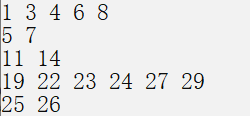
kendall相关性系数>0.9分组情况
与上图相同


spearman相关性系数>0.9分组情况
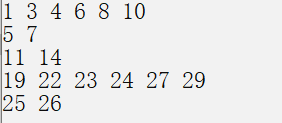

相关性系数>0.8的分组情况
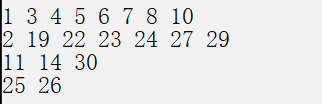

1:'飞行马赫数','高度','大气静压','大气密度','飞行器速度'<br>
2:'大气温度','大气声速'<br>
3:'空气流量','燃料流量'<br>
4:燃气雷诺数，壁面努塞尔比数<br>
5:'燃气温度','燃气粘度','燃气导热','燃气普朗特数','壁面对流换热系数','壁面热流'<br>

<AxesSubplot:>

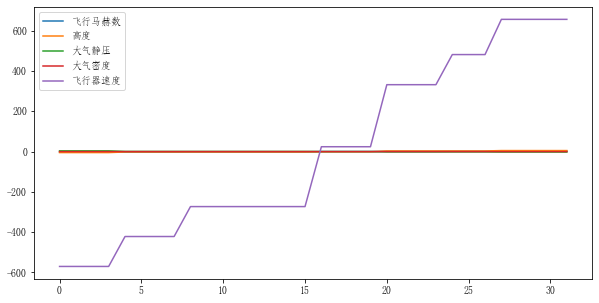

In [31]:
test1 = df[['飞行马赫数','高度','大气静压','大气密度','飞行器速度']]
test1.plot(figsize=(10,5))
#飞行马赫数,高度,大气密度,飞行器速度正相关


<AxesSubplot:>

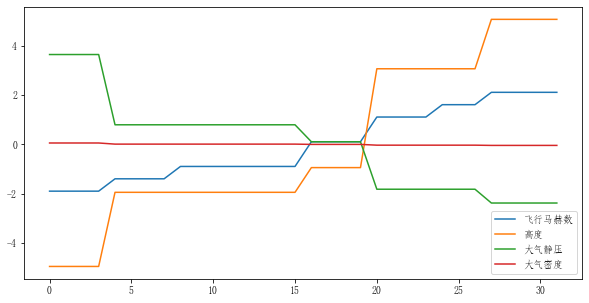

In [32]:
test1 = df[['飞行马赫数','高度','大气静压','大气密度']]
test1.plot(figsize=(10,5))
#飞行马赫数,高度,大气密度,飞行器速度正相关
#大气静压与其他成负相关

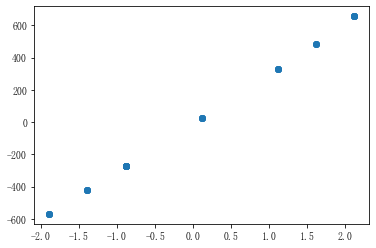

0     301.0
1     301.0
2     301.0
3     301.0
4     303.0
5     303.0
6     303.0
7     303.0
8     306.0
9     306.0
10    306.0
11    306.0
12    306.0
13    306.0
14    306.0
15    306.0
16    220.0
17    220.0
18    220.0
19    220.0
20    299.0
21    299.0
22    299.0
23    299.0
24    299.0
25    299.0
26    299.0
27    311.0
28    311.0
29    311.0
30    311.0
31    311.0
dtype: float64


In [33]:
plt.scatter(df['飞行马赫数'],df['飞行器速度'])
plt.show()
print(df['飞行器速度']//df['飞行马赫数']) # 飞行速度与马赫数之比等于当地音速

<AxesSubplot:>

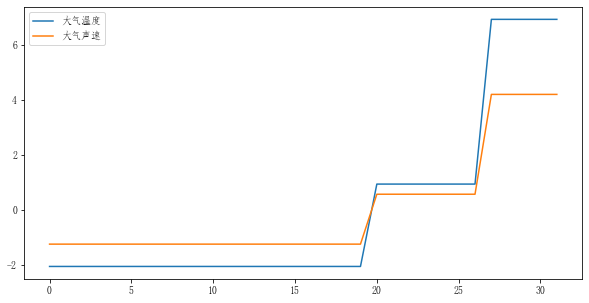

In [34]:
test2 = df[['大气温度','大气声速']]
test2.plot(figsize=(10,5))
#大气温度,大气声速正相关

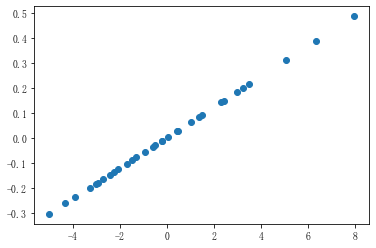

In [35]:
plt.scatter(df['空气流量'],df['燃料流量'])
plt.show()
#空气流量,燃料流量正相关

In [36]:
from sklearn.linear_model import LinearRegression
x = np.array(df['空气流量']).reshape(-1,1)
y = np.array(df['燃料流量']).reshape(-1,1)

reg = LinearRegression()
reg.fit(x, y)
reg.intercept_
#y=kx+b

array([5.46394641e-10])

In [37]:
reg.coef_
#y=0.61x

array([[0.06108736]])

<AxesSubplot:>

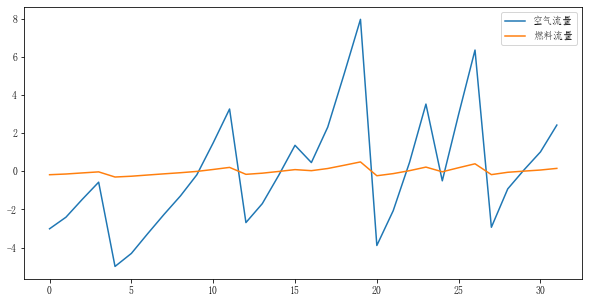

In [38]:
test3 = df[['空气流量','燃料流量']]
test3.plot(figsize=(10,5))

<AxesSubplot:>

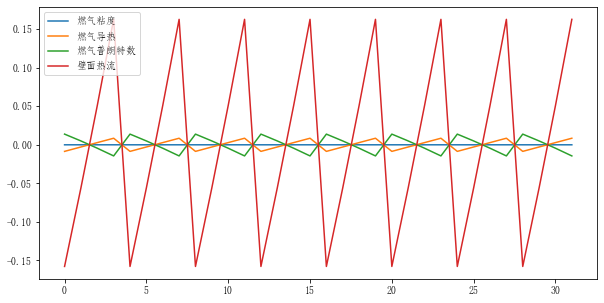

In [39]:
test4 = df[['燃气粘度','燃气导热','燃气普朗特数','壁面热流']]
test4.plot(figsize=(10,5))

燃气普朗特数与其他几个特征负相关

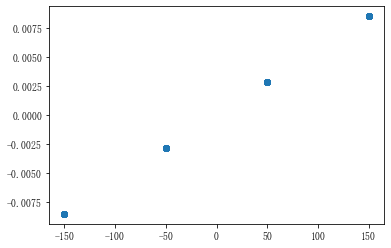

In [40]:
plt.scatter(df['燃气温度'],df['燃气导热'])
plt.show()

<AxesSubplot:>

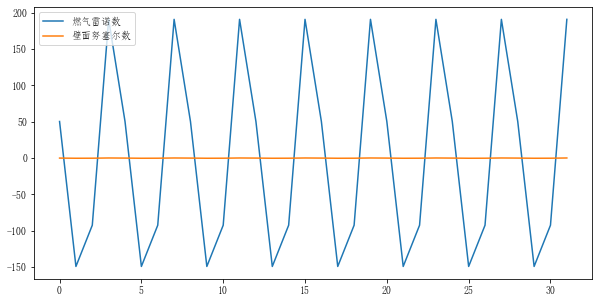

In [41]:
test4 = df[['燃气雷诺数','壁面努塞尔数']]
test4.plot(figsize=(10,5))

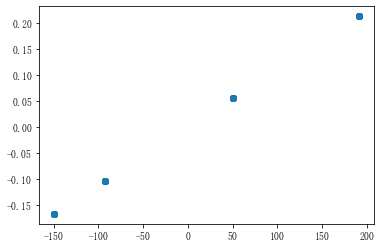

In [42]:
plt.scatter(df['燃气雷诺数'],df['壁面努塞尔数'])
plt.show()

In [43]:
data = df[['飞行马赫数','攻角','大气温度','燃气温度','流量系数']]
data.head()

,飞行马赫数,攻角,大气温度,燃气温度,流量系数
0,-1.890625,-4.0625,-2.055625,-150.0,-0.457469
1,-1.890625,-2.0625,-2.055625,-50.0,-0.426469
2,-1.890625,0.9375,-2.055625,50.0,-0.378469
3,-1.890625,3.9375,-2.055625,150.0,-0.332469
4,-1.390625,-4.0625,-2.055625,-150.0,-0.403469


In [44]:
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(data)
data[:5,:]

array([[-1.34353248, -1.40411368, -0.64044476, -1.34164079, -1.3426747 ],
       [-1.34353248, -0.71285772, -0.64044476, -0.4472136 , -1.25168947],
       [-1.34353248,  0.32402623, -0.64044476,  0.4472136 , -1.11080903],
       [-1.34353248,  1.36091018, -0.64044476,  1.34164079, -0.97579863],
       [-0.9882181 , -1.40411368, -0.64044476, -1.34164079, -1.18418427]])

1:'飞行马赫数','高度','大气静压','大气密度','飞行器速度'<br>
2:'大气温度','大气声速'<br>
3:'空气流量','燃料流量'<br>
4:燃气雷诺数，壁面努塞尔数<br>
5:'燃气温度','燃气粘度','燃气导热','燃气普朗特数','壁面对流换热系数','壁面热流'<br>

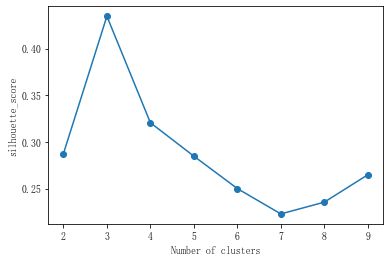

In [45]:
from sklearn import metrics

scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X_train_reduction)
    scores.append(metrics.silhouette_score(data, km.labels_ , metric='euclidean'))
plt.plot(range(2,10), scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans  # 导入kmeans算法

# 读取标准化后的数据
X_train = data
k = 3  # 确定聚类中心数

# 构建模型，随机种子设为123
kmeans_model = KMeans(n_clusters=3,n_jobs=4,random_state=123)
fit_kmeans = kmeans_model.fit(X_train)  # 模型训练

# 查看聚类结果
kmeans_cc = kmeans_model.cluster_centers_  # 聚类中心
print('各类聚类中心为：\n',kmeans_cc)
kmeans_labels = kmeans_model.labels_  # 样本的类别标签
print('各样本的类别标签为：\n',kmeans_labels)
r1 = pd.Series(kmeans_model.labels_).value_counts()  # 统计不同类别样本的数目
print('最终每个类别的数目为：\n',r1)
# 输出聚类分群的结果
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_,\
             columns=['飞行马赫数','攻角','大气温度','燃气温度','流量系数'])   # 将聚类中心放在数据框中

各类聚类中心为：
 [[-0.33225311 -1.03189893 -0.4254703  -0.92882824 -0.6633331 ]
 [ 1.26210627  0.55444489  1.3261735   0.3478328   1.35035872]
 [-0.7039666   0.84246821 -0.64044476  0.89442719 -0.35298981]]
各样本的类别标签为：
 [0 0 2 2 0 0 2 2 0 0 2 2 0 0 2 2 0 0 2 2 0 0 1 1 0 1 1 1 1 1 1 1]
最终每个类别的数目为：
 0    13
2    10
1     9
dtype: int64


D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


[-0.33225310506037925, 1.2621062679800008, -0.703966604603508]
[[-0.33225311 -1.03189893 -0.4254703  -0.92882824 -0.6633331  -0.33225311]
 [ 1.26210627  0.55444489  1.3261735   0.3478328   1.35035872  1.26210627]
 [-0.7039666   0.84246821 -0.64044476  0.89442719 -0.35298981 -0.7039666 ]]
5
[0.         1.25663706 2.51327412 3.76991118 5.02654825 0.        ]


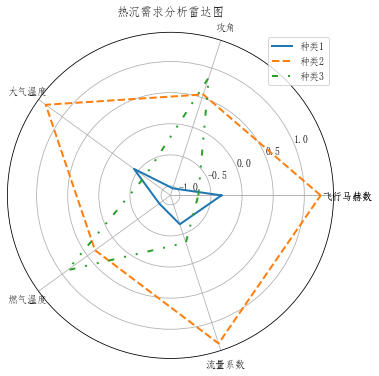

<function matplotlib.pyplot.close(fig=None)>

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt 
# 客户分群雷达图
labels = ['飞行马赫数','攻角','大气温度','燃气温度','流量系数']

legen = ['种类' + str(i + 1) for i in cluster_center.index]  # 客户群命名，作为雷达图的图例
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']
kinds = list(cluster_center.iloc[:, 0])
print(kinds)
# 由于雷达图要保证数据闭合，因此再添加L列，并转换为 np.ndarray
cluster_center = pd.concat([cluster_center, cluster_center[['飞行马赫数']]], axis=1)
centers = np.array(cluster_center.iloc[:, 0:])
print(centers)
# 分割圆周长，并让其闭合
n = len(labels)
print(n)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))
print(angle)
# 绘图
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, polar=True)  # 以极坐标的形式绘制图形

# 添加属性标签
# 画线
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2, label=kinds[i])

labels = np.concatenate((labels, [labels[0]]))
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('热沉需求分析雷达图')
plt.legend(legen)
plt.show()
plt.close


可以看出热沉需求与燃料流量成近似反比的关系

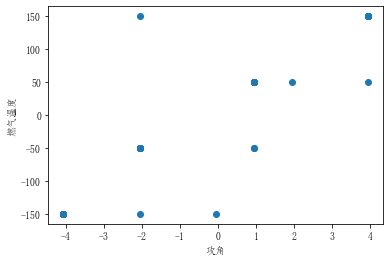

In [48]:
plt.scatter(df['攻角'],df['燃气温度'])
plt.xlabel('攻角')
plt.ylabel('燃气温度')
plt.show()

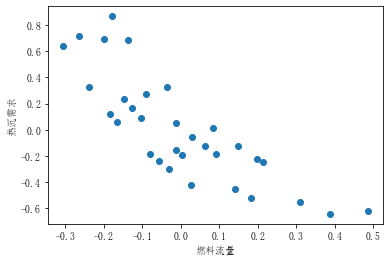

In [49]:
plt.scatter(df['燃料流量'],df['热沉需求'])
plt.xlabel('燃料流量')
plt.ylabel('热沉需求')
plt.show()

In [50]:
math.fabs(-5.943738e-02)

0.05943738